<p style="font-family: Cambria; text-align: center; font-size: 48px;">  Bivariate Analysis

<p style="font-family: Cambria; font-size: 34px;"> What is Bivariate Analysis?

<p style="font-family: Cambria; font-size: 22px;"><b> Definition: Bivariate analysis focuses on analyzing the relationship between two variables at a time.

<p style="font-family: Cambria; font-size: 22px;"><b> Purpose:To understand whether and how one variable influences or is associated with another variable.

Bivariate analysis examines the interaction between two variables to identify patterns, correlations, or significant differences. It helps determine whether a relationship exists and whether that relationship is strong, weak, positive, or negative.

In the Adult dataset, bivariate analysis is mainly performed to examine how different features (such as age, education, sex, workclass) are related to the target variable income.

<p style="font-family: Cambria; font-size: 22px;"><b>  What Do We Check in Bivariate Analysis?

1)Numerical vs Numerical

> Techniques:Pearson Correlation,Covariance

> Visualizations:Scatter Plot,Correlation Heatmap

> Examples: age vs hours-per-week,education-num vs capital-gain,age vs income_num

These help us understand: 

> Strength of linear relationship

> Direction (positive or negative correlation)

>Possible multicollinearity

2)Numerical vs Categorical

> Techniques:Independent T-test (2 groups),ANOVA (more than 2 groups)

> Visualizations: Box Plot,Violin Plot

> Examples: age vs income,hours-per-week vs income,education-num vs income

These help us understand:

> Whether mean values differ between categories

> Whether differences are statistically significant

3)Categorical vs Categorical

> Techniques: Chi-Square Test of Independence,Cross-tabulation (Contingency Table)

> Visualizations: Count Plot (with hue),Stacked Bar Chart

Examples: sex vs income,education vs income,workclass vs income

> These help us understand:

> Whether two categorical variables are associated

> Whether category distribution differs significantly

<p style="font-family: Cambria; font-size: 22px;"><b> Why Bivariate Analysis is Important?

1)Identifies key predictors of the target variable

2)Helps validate hypotheses

3)Detects significant relationships

4)Helps in feature selection for modeling

5)Provides statistical evidence (p-values)

In [2]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy.stats import ttest_ind, chi2_contingency, zscore

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [110]:
# Load the cleaned dataset
df_train_test= pd.read_csv('/Users/akhilamaheedhara/Desktop/train_test_adult.csv')

# Quick check
df_train_test.head()
df_train_test.info()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    48842 non-null  int64 
 1   workclass              48842 non-null  object
 2   fnlwgt                 48842 non-null  int64 
 3   education              48842 non-null  object
 4   education-num          48842 non-null  int64 
 5   marital-status         48842 non-null  object
 6   occupation             48842 non-null  object
 7   relationship           48842 non-null  object
 8   race                   48842 non-null  object
 9   sex                    48842 non-null  object
 10  capital-gain           48842 non-null  int64 
 11  capital-loss           48842 non-null  int64 
 12  hours-per-week    

<p style="font-family: Cambria;text-align: center;font-size: 28px;"><b> Numerical vs Numerical (Scatter Plots + Correlation)
<p style="font-family: Cambria;font-size: 28px;"><b> A) Scatter Plots

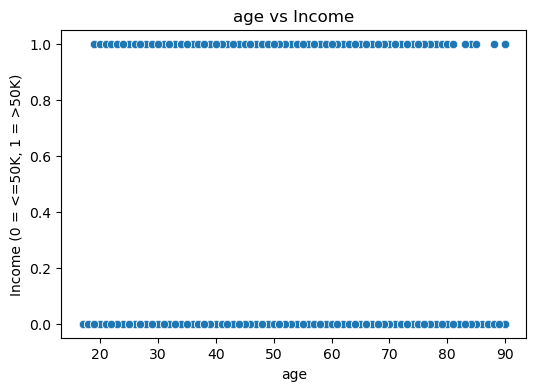

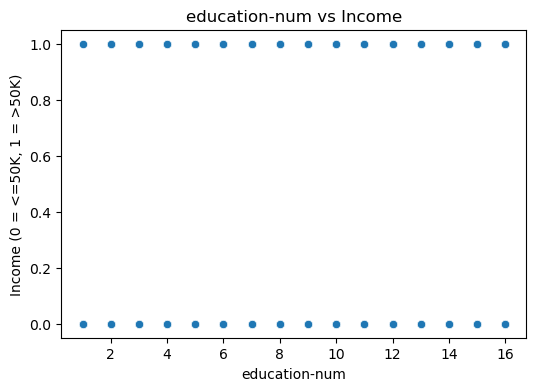

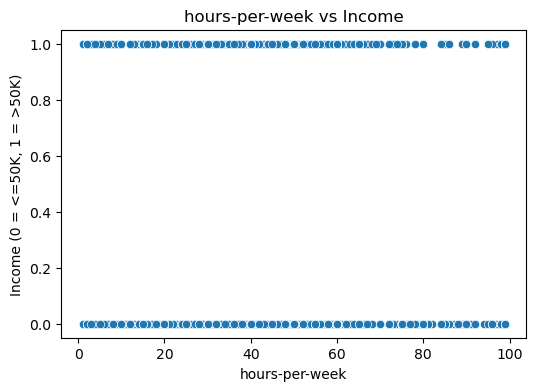

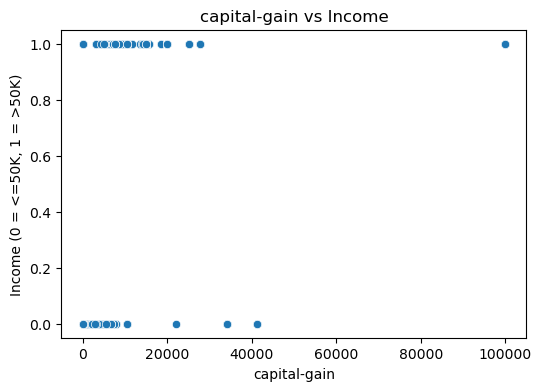

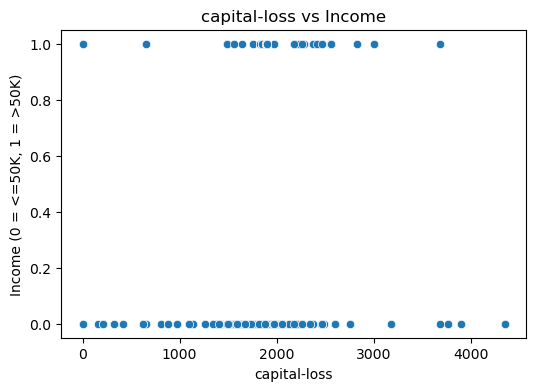

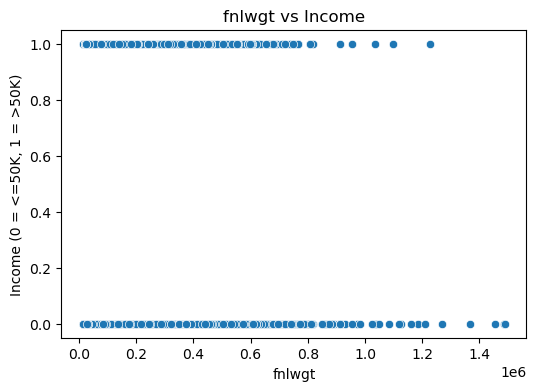

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'education-num', 'hours-per-week', 
            'capital-gain', 'capital-loss', 'fnlwgt']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_train_test[col], y=df_train_test['income_num'])
    plt.title(f"{col} vs Income")
    plt.xlabel(col)
    plt.ylabel("Income (0 = <=50K, 1 = >50K)")
    plt.show()


Age vs Income (KDE plot)

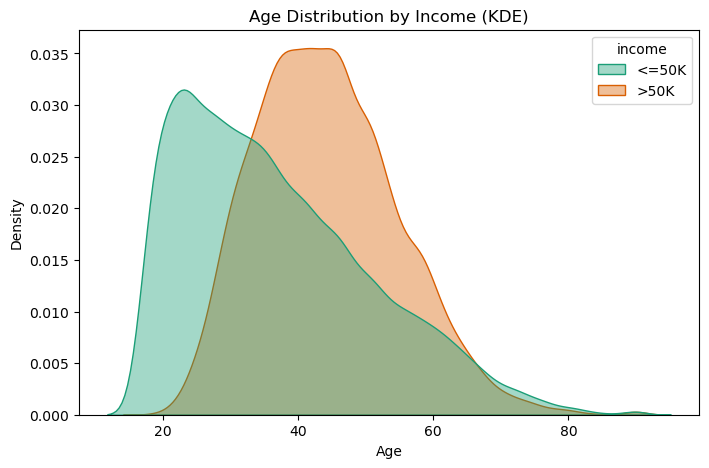

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df_train_test,
    x='age',
    hue='income',
    fill=True,
    common_norm=False,
    alpha=0.4,
    palette="Dark2"
)

plt.title("Age Distribution by Income (KDE)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

<p style="font-family: Cambria;font-size: 28px;"><b> B)Correlation Matrix (Pearson Correlation)

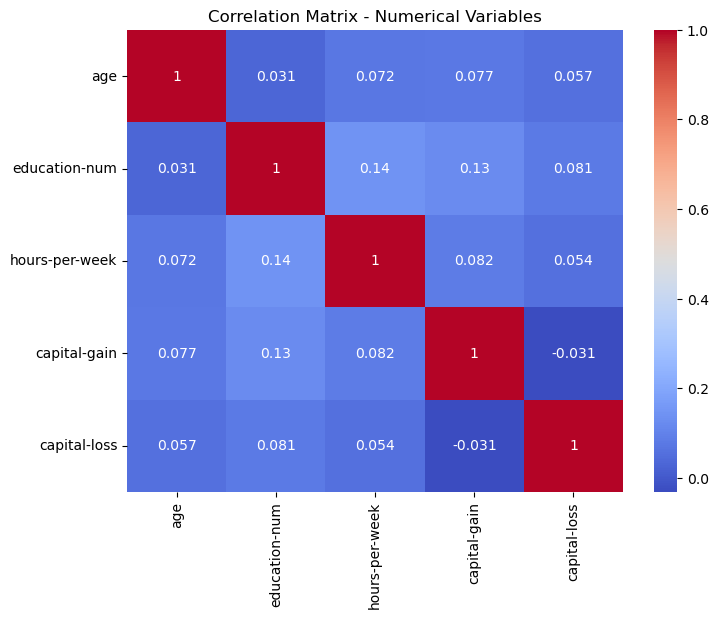

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['age', 'education-num', 'hours-per-week', 
                'capital-gain', 'capital-loss']

corr_matrix =df_train_test[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Numerical Variables")
plt.show()

<p style="font-family: Cambria;text-align: center;font-size: 28px;"><b> Correlation Matrix observations

> Stronger Correlations with Income:

1)Education-num → Positive correlation

2)Capital-gain → Strong positive correlation

3)Age → Moderate positive correlation

> Weak Correlations:

1)fnlwgt → Very weak / negligible

2)Capital-loss → Weak to moderate

<p style="font-family: Cambria;text-align: center;font-size: 28px;"><b> Categorical vs Income (Bar Charts / Boxplots)

<p style="font-family: Cambria;font-size: 24px;"><b>A) Sex vs Income

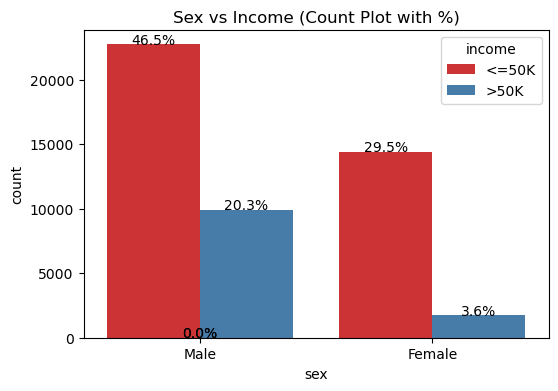

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(6,4))

ax = sns.countplot(x='sex', hue='income', data=df_train_test, palette="Set1")

total = len(df_train_test)

for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center')

plt.title("Sex vs Income (Count Plot with %)")
plt.show()

In [168]:
cross_tab = pd.crosstab(df_train_test['sex'],df_train_test['income'], normalize='index') * 100
print(cross_tab)

income      <=50K       >50K
sex                         
Female  89.074852  10.925148
Male    69.623277  30.376723


<p style="font-family: Cambria;font-size: 28px;"><b>Observation:

1)Males dominate the >50K category.

2)Females are mostly concentrated in ≤50K.

3)Income inequality by gender is clearly visible.

Interpretation:Sex has a strong association with income.

<p style="font-family: Cambria;font-size: 24px;"><b> B)Education vs Income

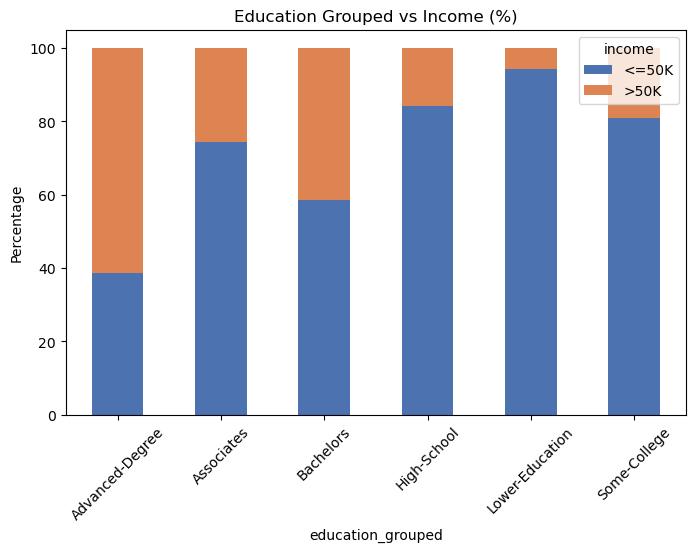

In [176]:
colors = ['#4C72B0', '#DD8452']
edu_income = pd.crosstab(df_train_test['education_grouped'],
                         df_train_test['income'],
                         normalize='index') * 100

edu_income.plot(kind='bar',
                stacked=True,
                color = colors,
                figsize=(8,5))

plt.ylabel("Percentage")
plt.title("Education Grouped vs Income (%)")
plt.xticks(rotation=45)
plt.show()

<p style="font-family: Cambria;font-size: 28px;"><b>Observation:

1)Higher degrees (Masters, Doctorate, Prof-school) have higher proportion of >50K earners.

2)HS-grad and lower education mostly fall into ≤50K.

3)The relationship is clearly visible.

Interpretation:Education category strongly influences income.

<p style="font-family: Cambria;font-size: 24px;"><b> C) Workclass vs Income

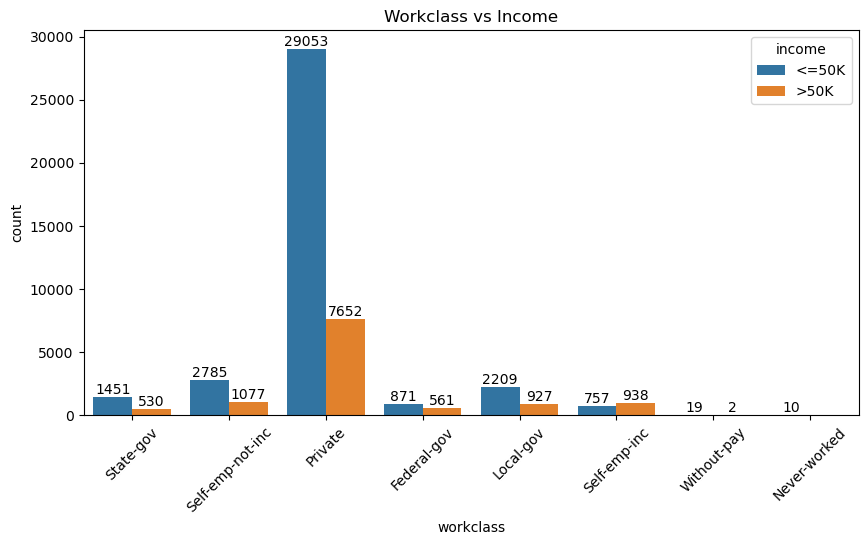

In [136]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='workclass', hue='income', data=df_train_test)
plt.xticks(rotation=45)
plt.title("Workclass vs Income")

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


<p style="font-family: Cambria;font-size: 28px;"><b>Observation:

1)Private sector employees dominate both income groups.

2)Self-employed individuals show higher proportion of >50K earners.

3)Some workclasses have very low representation in >50K.

Interpretation:Workclass has moderate influence on income.

<p style="font-family: Cambria;text-align: center;font-size: 28px;"><b> Boxplots (Numerical vs Income)

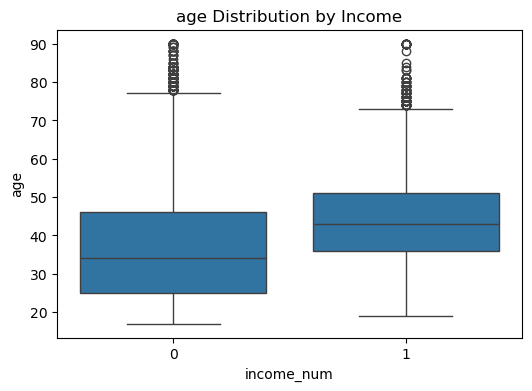

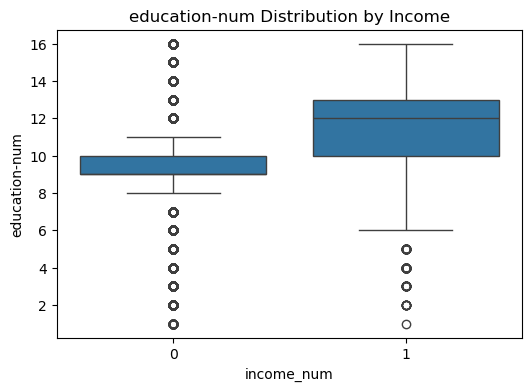

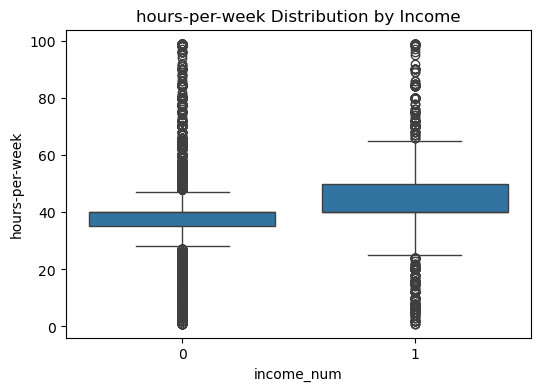

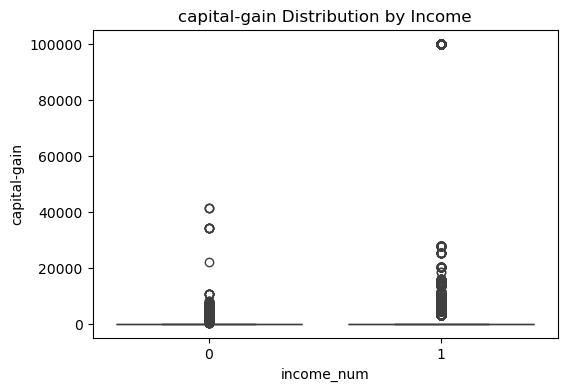

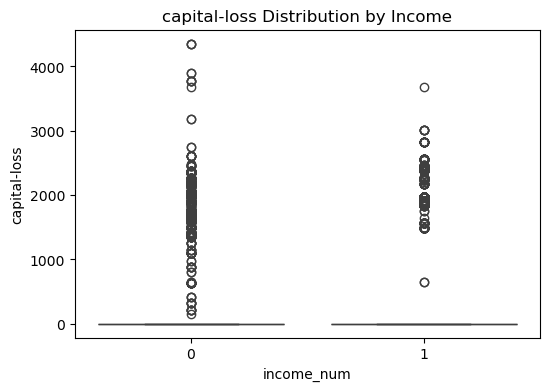

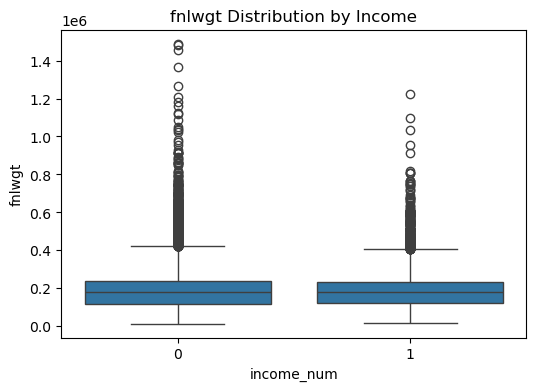

In [138]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='income_num', y=col, data=df_train_test)
    plt.title(f"{col} Distribution by Income")
    plt.show()

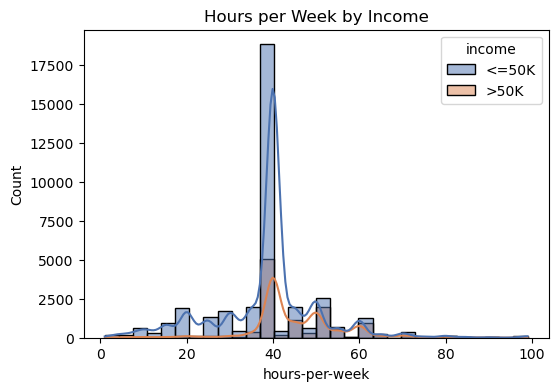

In [190]:
plt.figure(figsize=(6,4))

sns.histplot(data=df_train_test,
             x='hours-per-week',
             hue='income',
             palette=colors,
             bins=30,
             kde=True)

plt.title("Hours per Week by Income")
plt.show()

<p style="font-family: Cambria;text-align: center;font-size: 28px;"><b>Observations:

1)Age vs Income

>a)Individuals earning >50K tend to be older than those earning ≤50K.

>b)The highest earning group is concentrated between 35–55 years.

>c)Very young individuals (under 25) rarely earn >50K.

>d)After around age 60, high income frequency decreases.

Interpretation: Age has a moderate positive relationship with income.

2)Education-num vs Income 

>a)The >50K group has significantly higher education levels.

>b)Median education-num is much higher for high-income individuals.

>c)People with lower education years mostly fall into ≤50K.

Interpretation:Education level has a strong positive relationship with income.

>This is one of the strongest predictors.

3)Hours-per-week vs Income

>a)High-income individuals generally work slightly more hours.

>b)The difference exists but is not extremely large.

>c)Most people work around 40 hours, regardless of income.

Interpretation:Hours worked has a weak to moderate effect on income.

4)Capital Gain vs Income

>a)Individuals with high capital gain are overwhelmingly in the >50K group.

>b)Most ≤50K individuals have zero capital gain.

>c)Distribution is highly skewed.

Interpretation:Capital gain has a very strong positive relationship with income.

>One of the most powerful predictors.

5)Capital-loss vs Income

>Capital-loss shows a weak to moderate relationship with income, as most individuals have zero loss and only a small proportion of higher-loss individuals fall into the >50K category.

6)fnlwgt vs Income

>The variable fnlwgt shows no meaningful relationship with income, as its distribution is similar across both income groups and has negligible correlation with the target variable.

<p style="font-family: Cambria;text-align: center;font-size:38px;"><b> FINAL CONCLUSION OF BIVARIATE ANALYSIS

From the analysis, the following factors significantly influence income:

<p style="font-family: Cambria;font-size: 28px;"><b> Strong Predictors:

1)Education level

2)Capital gain

3)Sex

4)Age

<p style="font-family: Cambria;font-size: 28px;"><b>Moderate Predictors:

1)Workclass

2)Hours-per-week

<p style="font-family: Cambria;font-size: 28px;"><b>Weak Predictors:

1)fnlwgt

2)Capital-loss (less impact compared to capital gain)

<p style="font-family: Cambria;font-size: 28px;"><b>Overall Conclusion

The probability of earning more than 50K annually increases when:

a)The individual has higher education

b)The individual has capital gains

c)The individual is middle-aged

d)The individual works longer hours

e)The individual is male (in this dataset)

Education and capital gain appear to be the most influential variables.